# Birds 515 Species Classification with CNN-DL 

## Proje [linki](https://www.kaggle.com/datasets/gpiosenka/100-bird-species)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [41]:
df = pd.read_csv("/kaggle/input/100-bird-species/birds.csv")
df

,class id,filepaths,labels,data set,scientific name
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
...,...,...,...,...,...
87869,514,valid/ZEBRA DOVE/1.jpg,ZEBRA DOVE,valid,GEOPELIA STRIATA
87870,514,valid/ZEBRA DOVE/2.jpg,ZEBRA DOVE,valid,GEOPELIA STRIATA
87871,514,valid/ZEBRA DOVE/3.jpg,ZEBRA DOVE,valid,GEOPELIA STRIATA
87872,514,valid/ZEBRA DOVE/4.jpg,ZEBRA DOVE,valid,GEOPELIA STRIATA


In [42]:
train_path = "/kaggle/input/100-bird-species/train"
test_path = "/kaggle/input/100-bird-species/test"

In [43]:
import cv2
img = cv2.imread("/kaggle/input/100-bird-species/valid/DALMATIAN PELICAN/4.jpg")
img.shape

(224, 224, 3)

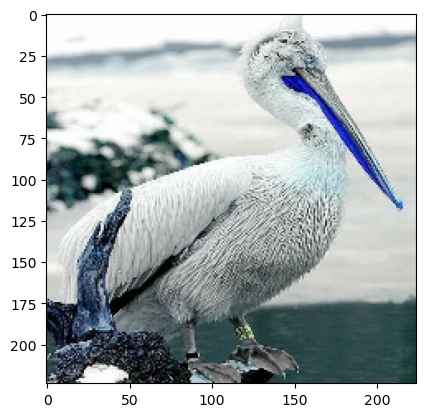

In [44]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.savefig('sample.png')

In [46]:
height = 100
width = 100
batch_size = 120
seed = 73

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(test_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 66378 images belonging to 515 classes.
Found 515 images belonging to 515 classes.


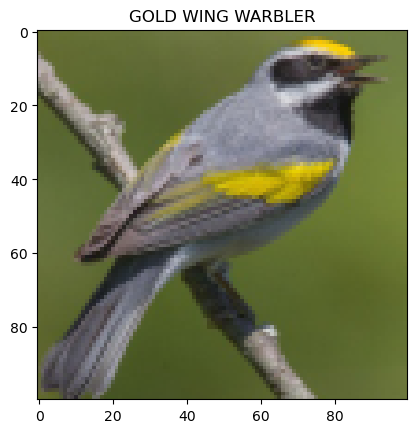

In [50]:
import matplotlib.pyplot as plt

# Veri kümesinden rastgele bir görüntü seçin
image_batch, label_batch = next(iter(train_dataset))

aziz = np.random.randint(len(image_batch)-1, size=1)[0] # rastgele veriye bakmak için

image = image_batch[aziz]
label = label_batch[aziz]

# Sınıf indekslerinden sınıf adlarına dönüştürme
class_names = list(train_dataset.class_indices.keys())
label = class_names[label.argmax()]

# Görüntüyü ve labelleri gösterme
plt.imshow(image)
plt.title(label)
plt.show()

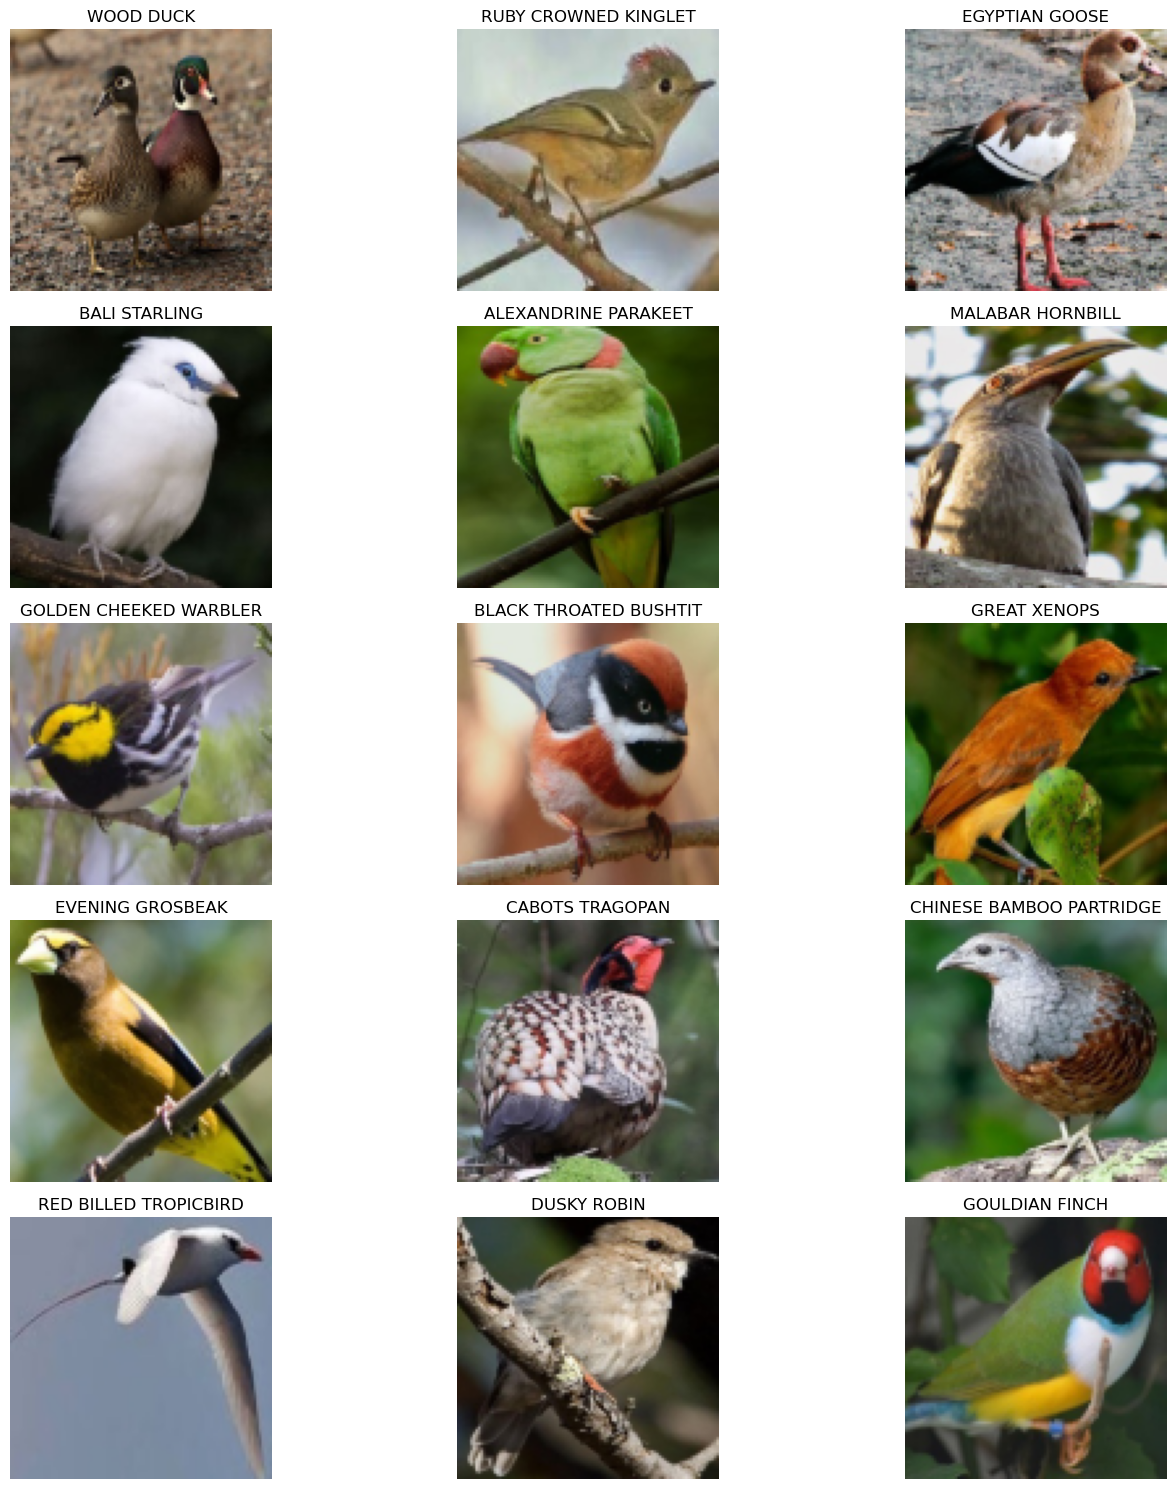

In [51]:
import random as rn
import matplotlib.pyplot as plt

r_num = 5
c_num = 3
fig,ax = plt.subplots(r_num,c_num)
fig.set_size_inches(15,15)
img,y = train_dataset.next()
for i in range(r_num):
    for j in range (c_num):
        aziz = rn.randint(0,batch_size-1)
        label = list(train_dataset.class_indices.keys())[np.argmax(y[aziz])]
        ax[i,j].imshow(img[aziz])
        ax[i,j].set_title(label)
        ax[i,j].axis('off') ## axis leri silmek için bunu yazdım.

plt.tight_layout()
plt.savefig('birds.png')

## Derin Öğrenme ve CNN(Computational Neural Network)

In [52]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [58]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Dense(515, activation='softmax') # 515 tür var ondan dense 515 olarak belirledim 
])

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                      

In [60]:
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Derin Öğrenme ve CNN (Convolutional Neural Network)

In [61]:
epochs = 15
history = model.fit(train_dataset, steps_per_epoch=len(train_dataset), epochs=epochs, validation_data=test_dataset, validation_steps=len(test_dataset))

Epoch 1/15
554/554 [==============================] - 961s 2s/step - loss: 3.9701 - accuracy: 0.2327 - val_loss: 2.7554 - val_accuracy: 0.3981
Epoch 2/15
554/554 [==============================] - 950s 2s/step - loss: 2.0016 - accuracy: 0.5522 - val_loss: 1.5851 - val_accuracy: 0.6136
Epoch 3/15
554/554 [==============================] - 953s 2s/step - loss: 1.1451 - accuracy: 0.7291 - val_loss: 1.5801 - val_accuracy: 0.6447
Epoch 4/15
554/554 [==============================] - 958s 2s/step - loss: 0.6015 - accuracy: 0.8505 - val_loss: 1.5244 - val_accuracy: 0.6524
Epoch 5/15
554/554 [==============================] - 952s 2s/step - loss: 0.3413 - accuracy: 0.9117 - val_loss: 1.5979 - val_accuracy: 0.6427
Epoch 6/15
554/554 [==============================] - 954s 2s/step - loss: 0.2358 - accuracy: 0.9366 - val_loss: 1.5941 - val_accuracy: 0.6699
Epoch 7/15
554/554 [==============================] - 965s 2s/step - loss: 0.2011 - accuracy: 0.9440 - val_loss: 1.8209 - val_accuracy: 0.6233

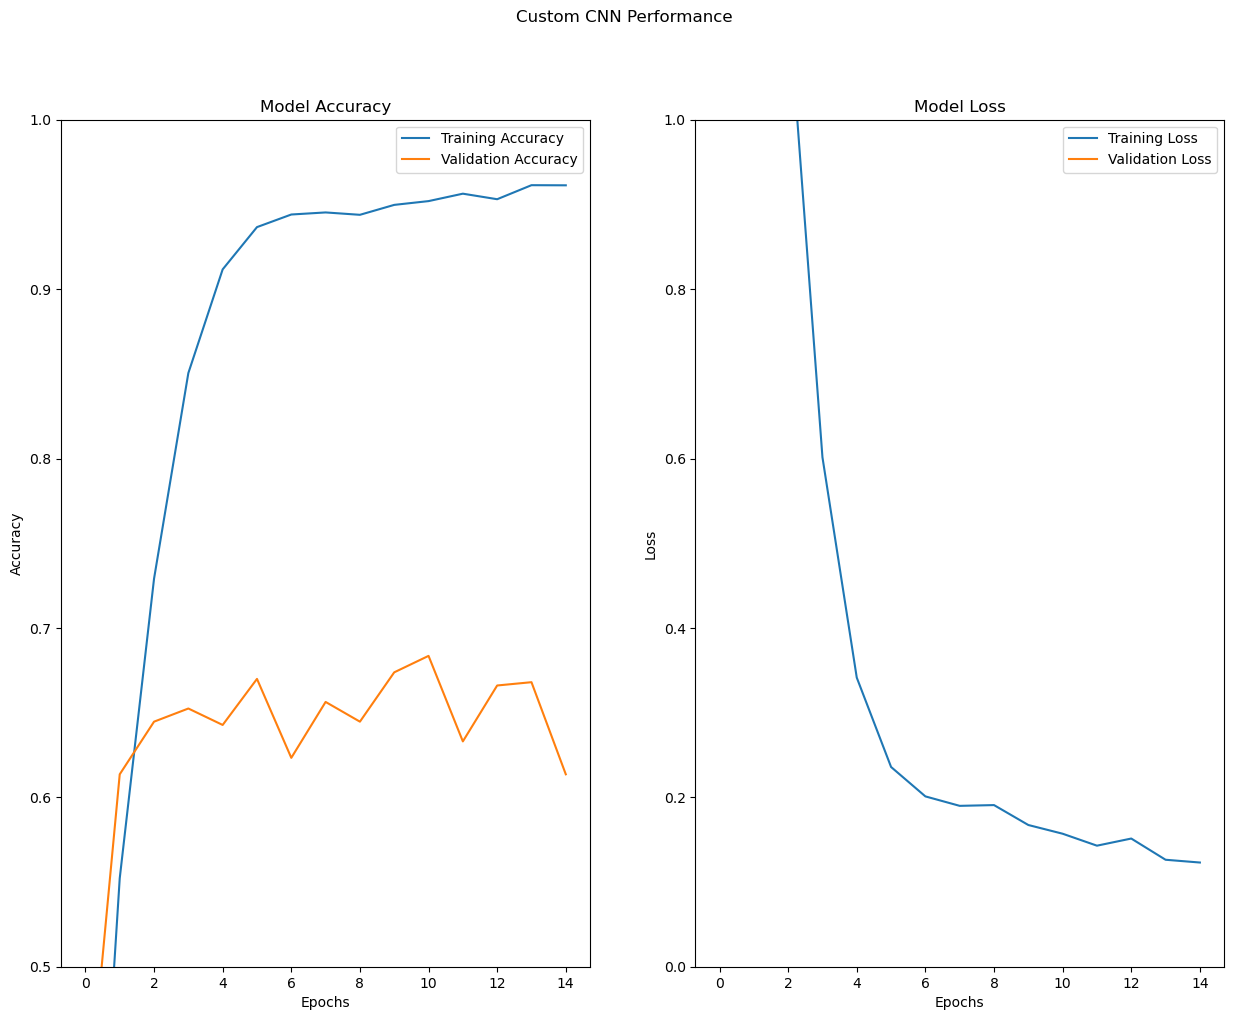

<Figure size 1000x700 with 0 Axes>

In [62]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,11)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

In [63]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)  # En yüksek olasılıklı sınıfın indekslerini alır
predictions = predictions.astype(int)  # int tipine dönüştürür
predictions[:5]

5/5 [==============================] - 3s 538ms/step


array([423, 174, 408, 144, 490])

4/4 [==============================] - 0s 100ms/step


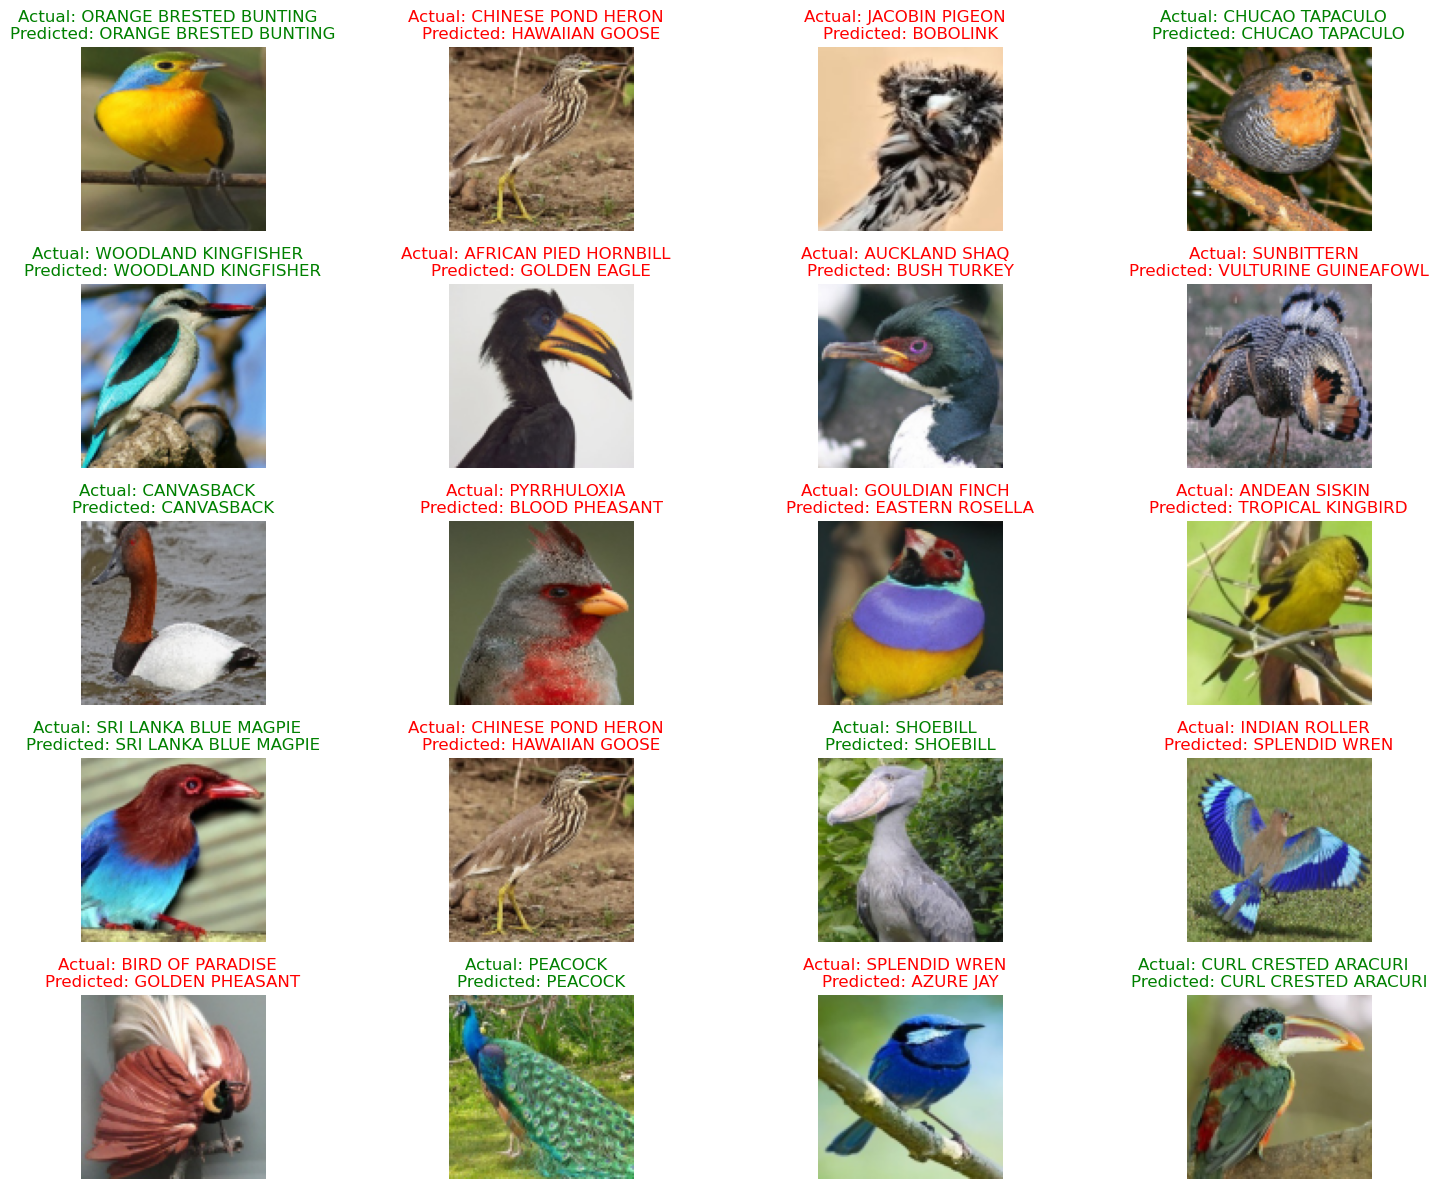

In [65]:
def map_pred(pred):
    return [list(train_dataset.class_indices.keys())[i] for i in pred]

a = 5
b = 4

fig,ax=plt.subplots(a,b)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(a):
    for j in range (b):
        aziz = rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[aziz])
        if labels[aziz] == predicts[aziz]:
            ax[i,j].set_title('Actual: ' + labels[aziz] + '  \nPredicted: ' + predicts[aziz] , color = 'green')
        else: 
            ax[i,j].set_title('Actual: ' + labels[aziz] + '  \nPredicted: ' +  predicts[aziz] , color = 'red')
        ax[i,j].axis("off")

plt.tight_layout()
plt.savefig('cnn_dl_birds.png')